In [162]:
#Dependencies
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
from matplotlib import dates as plt_dates


In [163]:
#Read in CSV
bb1_csv = '../Resources/billboard_1_year.csv'
bb3_csv = '../Resources/billboard_3_year.csv'
bb5_csv = '../Resources/billboard_5_year.csv'
bb1_df = pd.read_csv(bb1_csv)
bb3_df = pd.read_csv(bb3_csv)
bb5_df = pd.read_csv(bb5_csv)

In [164]:
#Defining a function to look for songs ranked #1
def single(df):
    try:
        if (df['rank'].isin([1]).any()):
            return df
    except KeyError:
        return None

In [165]:
#Groupby artist and title in order to determine groups
bb1_df['date'] = bb1_df['date'].transform(plt_dates.datestr2num)
gb_songtitle = bb1_df.groupby(['artist','title'])
wasrankone_df = gb_songtitle.apply(single)
wasrankone_df = wasrankone_df.dropna()
wasrankone_df = wasrankone_df.groupby(['artist','title'])

wasrankone_df.size()

artist                               title                                        
Ariana Grande                        7 Rings                                          31
                                     Thank U, Next                                    28
Billie Eilish                        Bad Guy                                          21
Drake                                In My Feelings                                   14
Halsey                               Without Me                                       46
Jonas Brothers                       Sucker                                           25
Lady Gaga & Bradley Cooper           Shallow                                          45
Lil Nas X Featuring Billy Ray Cyrus  Old Town Road                                    25
Maroon 5 Featuring Cardi B           Girls Like You                                   39
Post Malone & Swae Lee               Sunflower (Spider-Man: Into The Spider-Verse)    44
Shawn Mendes & Camila Cabel

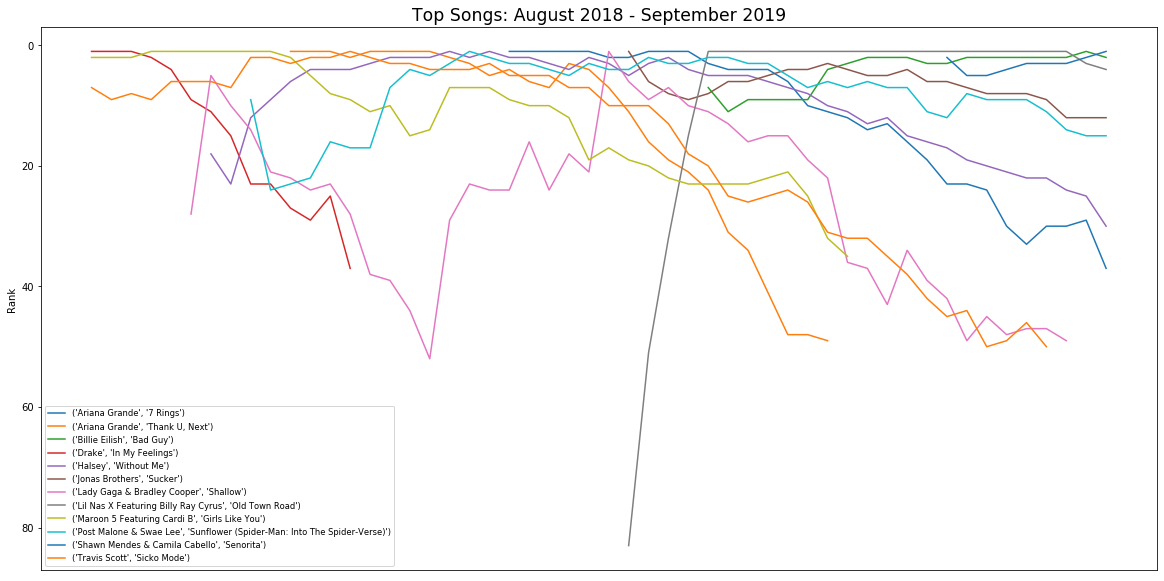

In [166]:
#Plotting songs for Top Songs in Aug 2018 - Sep 2019
plt.figure(figsize=(20,10))
for key, df in wasrankone_df:
    plt.plot(df['date'], df['rank'], label=key)
    
plt.legend(fontsize='small')
plt.gca().invert_yaxis()
plt.title('Top Songs: August 2018 - September 2019', fontsize='xx-large')
plt.xticks([], [])
plt.ylabel('Rank')
plt.savefig("../Resources/topsongsaug18_sep19.png", bbox_inches='tight')
plt.show()

In [167]:
# 3 Year dataset
bb3_df = bb3_df[(bb3_df['date'] > '2016-09-01') & (bb3_df['date'] < '2018-08-05')]
bb3_df = pd.DataFrame(bb3_df)
bb3_df

Unnamed: 0                                       artist  \
5600            0                                        Drake   
5601            1                Cardi B, Bad Bunny & J Balvin   
5602            2                   Maroon 5 Featuring Cardi B   
5603            3  6ix9ine Featuring Nicki Minaj & Murda Beatz   
5604            4                                  Post Malone   
...           ...                                          ...   
15595          95                                  Frank Ocean   
15596          96                                 Lil Uzi Vert   
15597          97                                  Frank Ocean   
15598          98                       William Michael Morgan   
15599          99                                   Luke Bryan   

                title  lastPos  rank  weeks        date  
5600   In My Feelings        1     1      4  2018-08-04  
5601        I Like It        2     2     16  2018-08-04  
5602   Girls Like You        3     3      9  2018-08-04  
5603             FEFE        0     4      1  2018-08-04  
5604       Better Now        7     5     13  2018-08-04  
...               ...      ...   ...    ...         ...  
15595            Solo        0    96      1  2016-09-10  
15596   You Was Right       92    97      7  2016-09-10  
15597          Nights        0    98      1  2016-09-10  
15598    I Met A Girl        0    99      1  2016-09-10  
15599            Move        0   100      1  2016-09-10  

[10000 rows x 7 columns]

In [168]:
#Top Songs of August 2018 - Sep 2016 
def single(df):
    try:
        if (df['rank'].isin([1]).any()):
            return df
    except KeyError:
        return None

In [169]:
bb3_df['date'] = bb3_df['date'].transform(plt_dates.datestr2num)
gb_songtitle = bb3_df.groupby(['artist','title'])
rankone_df = gb_songtitle.apply(single)
rankone_df = rankone_df.dropna()
rankone_df = rankone_df.groupby(['artist','title'])

rankone_df.size()

artist                                                                   title                     
Bruno Mars                                                               That's What I Like            51
Camila Cabello Featuring Young Thug                                      Havana                        45
Cardi B                                                                  Bodak Yellow (Money Moves)    34
Cardi B, Bad Bunny & J Balvin                                            I Like It                     16
Childish Gambino                                                         This Is America               12
DJ Khaled Featuring Justin Bieber, Quavo, Chance The Rapper & Lil Wayne  I'm The One                   22
Drake                                                                    God's Plan                    27
                                                                         In My Feelings                 4
                                                    

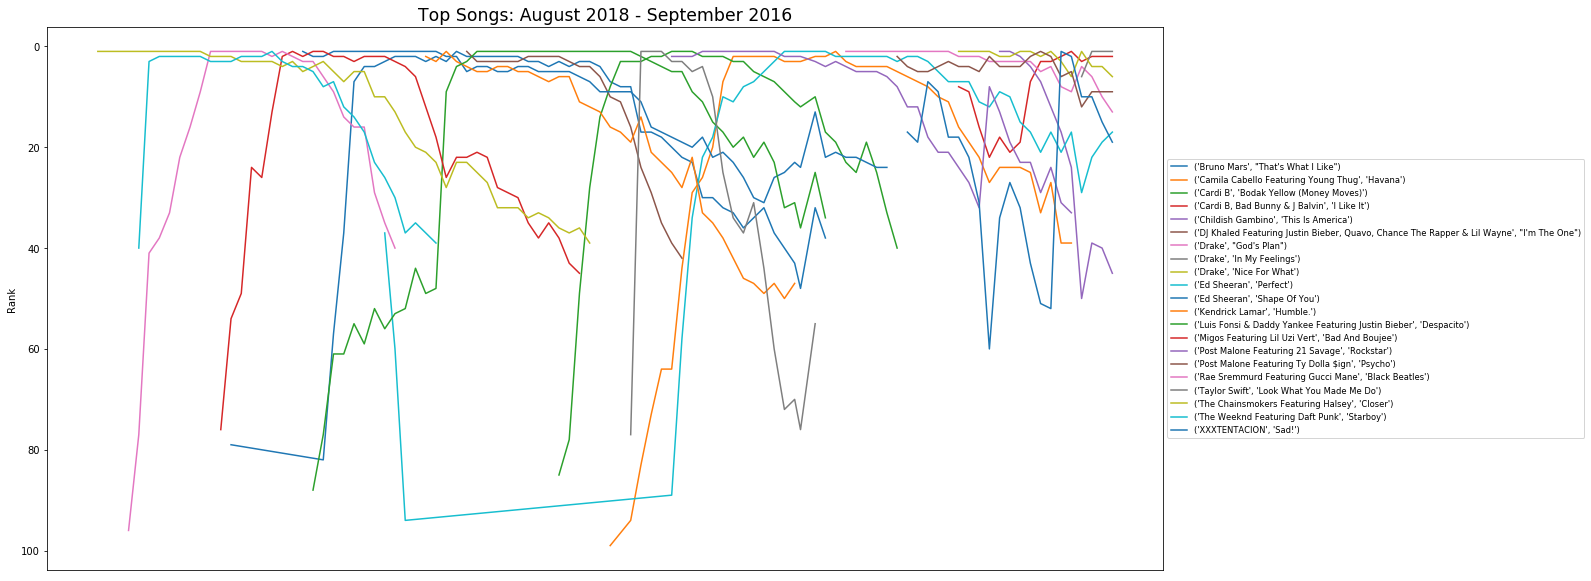

In [170]:
#Plotting songs for Top Songs in Aug 2018 - Sep 2016
plt.figure(figsize=(20,10))
for key, df in rankone_df:
    plt.plot(df['date'], df['rank'], label=key)

plt.legend(fontsize='small', loc='center left', bbox_to_anchor=(1, 0.5))
plt.gca().invert_yaxis()
plt.title('Top Songs: August 2018 - September 2016', fontsize='xx-large')
plt.xticks([], [])
plt.ylabel('Rank')
plt.savefig("../Resources/topsongsaug18_sep16.png", bbox_inches='tight')
plt.show()

In [171]:
#5 Year Dataset
bb5_df = bb5_df[(bb5_df['date'] > '2014-09-05') & (bb5_df['date'] < '2016-08-10')]
bb5_df = pd.DataFrame(bb5_df)
bb5_df

Unnamed: 0                           artist                      title  \
16000           0          Sia Featuring Sean Paul              Cheap Thrills   
16001           1    Drake Featuring WizKid & Kyla                  One Dance   
16002           2  Calvin Harris Featuring Rihanna  This Is What You Came For   
16003           3                Justin Timberlake    Can't Stop The Feeling!   
16004           4  The Chainsmokers Featuring Daya          Don't Let Me Down   
...           ...                              ...                        ...   
25995          95                            Usher                Good Kisser   
25996          96       TeeFLii Featuring 2 Chainz                   24 Hours   
25997          97                      Chris Young          Who I Am With You   
25998          98                       Trey Songz                    Foreign   
25999          99                Pharrell Williams            Come Get It Bae   

       lastPos  rank  weeks        date  
16000        3     1     23  2016-08-06  
16001        1     2     16  2016-08-06  
16002        4     3     12  2016-08-06  
16003        2     4     11  2016-08-06  
16004        5     5     23  2016-08-06  
...        ...   ...    ...         ...  
25995       91    96     17  2014-09-13  
25996        0    97      1  2014-09-13  
25997       95    98     19  2014-09-13  
25998       98    99      9  2014-09-13  
25999       93   100     15  2014-09-13  

[10000 rows x 7 columns]

In [172]:
def single(df):
    try:
        if (df['rank'].isin([1]).any()):
            return df
    except KeyError:
        return None


In [173]:
bb5_df['date'] = bb5_df['date'].transform(plt_dates.datestr2num)
gb_songtitle = bb5_df.groupby(['artist','title'])
rankone5_df = gb_songtitle.apply(single)
rankone5_df = rankone5_df.dropna()
rankone5_df = rankone5_df.groupby(['artist','title'])

rankone5_df.size()


artist                                 title                  
Adele                                  Hello                      26
Desiigner                              Panda                      22
Drake Featuring WizKid & Kyla          One Dance                  16
Justin Bieber                          Love Yourself              36
                                       Sorry                      39
                                       What Do You Mean?          31
Justin Timberlake                      Can't Stop The Feeling!    11
Mark Ronson Featuring Bruno Mars       Uptown Funk!               56
Meghan Trainor                         All About That Bass        40
OMI                                    Cheerleader                35
Rihanna Featuring Drake                Work                       26
Sia Featuring Sean Paul                Cheap Thrills              23
Taylor Swift                           Blank Space                36
                                       S

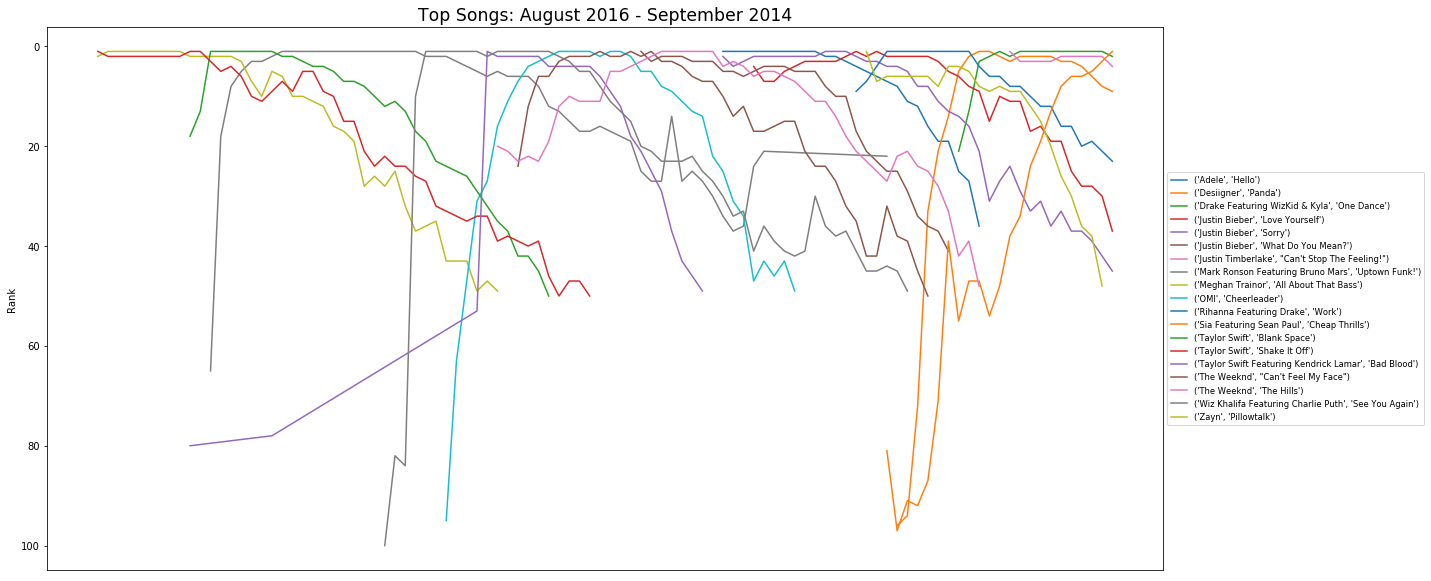

In [174]:
#Plotting songs for Top Songs in Aug 2016 - Sep 2014
plt.figure(figsize=(20,10))
for key, df in rankone5_df:
    plt.plot(df['date'], df['rank'], label=key)
    
plt.legend(fontsize='small', loc='center left', bbox_to_anchor=(1, 0.5))
plt.gca().invert_yaxis()
plt.title('Top Songs: August 2016 - September 2014', fontsize='xx-large')
plt.xticks([], [])
plt.ylabel('Rank')
plt.savefig("../Resources/topsongsaug16_sep14.png", bbox_inches='tight')
plt.show()